# Task-1
### Iris Flower Classification

### Problem Statement:
   Iris flower has three species: setosa, versicolor, and virginica, which differs according to theirmeasurements. 
  Now assume that you have the measurements of the iris flowers according totheir species, and here your task is to train a machine learning model that can learn from themeasurements of the iris species and classify them.

### Dataset:
https://www.kaggle.com/datasets/saurabh00007/iriscsv

### Github:

https://github.com/AkulaVamshi260/OIBSIP
 

### Name: Akula Vamshi
### Email: vamshipatel260@gmail.com

#### Import Library


In [1]:
#import libraries for analysing and visualization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#import libraries for Training/Testing, Model selection 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# import libraries for evaluatin model performance 
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report 

#### Load Dataset

In [2]:
#Load the dataset 
df=pd.read_csv("Iris.csv")

In [3]:
# Displaying first 5 records 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Displaying last 5 records 
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#size of the dataset (Rows & columns)
df.shape


(150, 6)

In [7]:
# Print Column Names Only
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Summary statistics
# if std is 0, that column should be removed from analysis
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Drop unimportant columns

In [9]:
# Remove unimportant column:Id
df.drop(['Id'],axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Check for Null Values and Manipulate Data, if Null values found

In [10]:
#Finding the null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# This will display rows with at least one null value across all columns
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


####  Check for Duplicates and Drop those Rows, if Duplicates found

In [12]:
# This will display all duplicate rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]
duplicate_rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
# This will display all duplicate rows (including the first occurrence)
all_duplicate_rows = df[df.duplicated(keep=False)]
all_duplicate_rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [14]:
# Remove Duplicate Rows, ifany
# Keep first row and remove other duplicate rows of that row
df = df.drop_duplicates(keep='first')

In [15]:
# This will display all duplicate rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]
duplicate_rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


#### Data Visualization

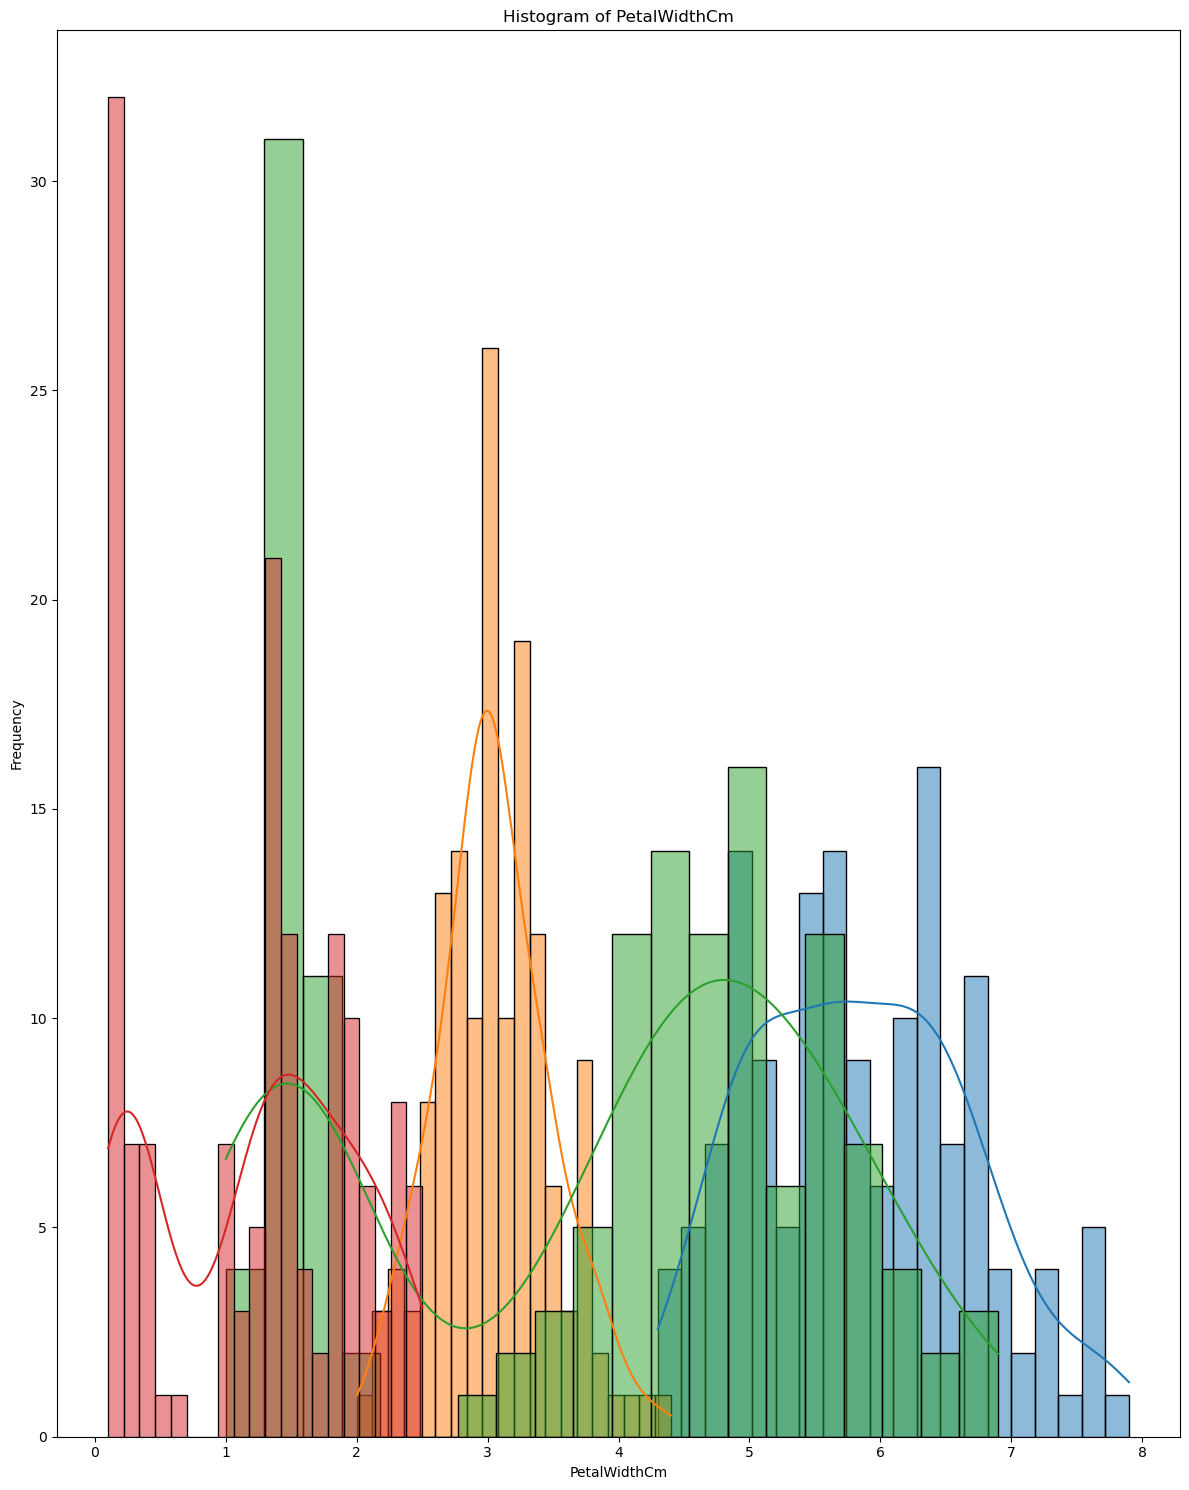

In [19]:
# Histogram 
# Select only numeric type of columns by their names as:
df1 = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 15))
for i, var in enumerate(df1, 1):
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

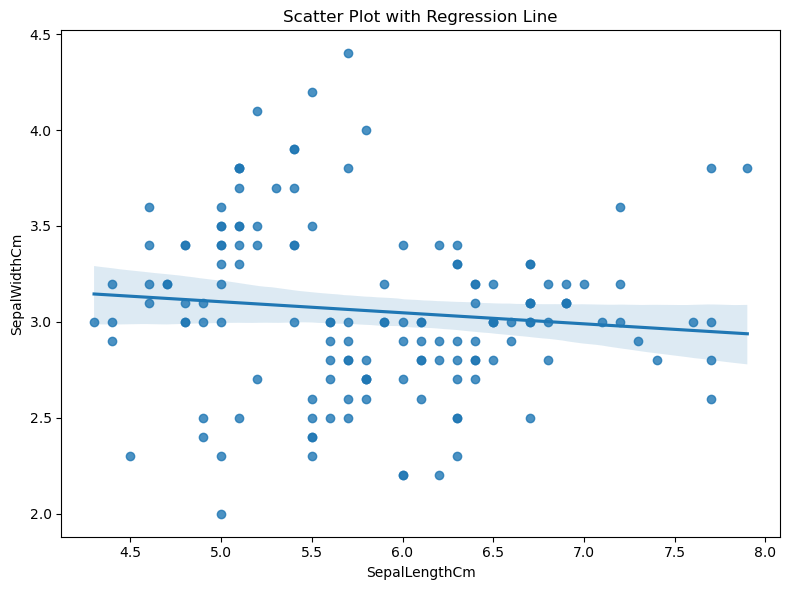

In [20]:
# scatter plot 
# Create a scatter plot with regression line using Seaborn
plt.figure(figsize=(8, 6))

sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

plt.title('Scatter Plot with Regression Line')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.tight_layout()

# Show the plot
plt.show()

#### Handling Outliers

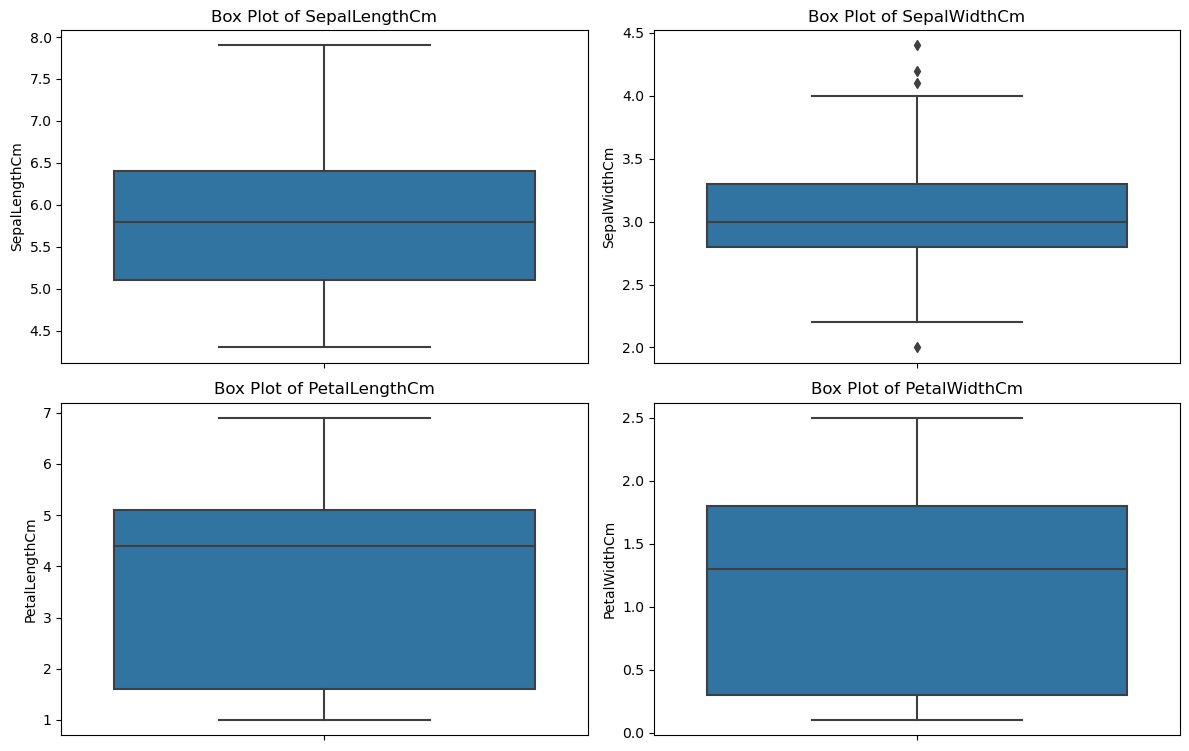

In [21]:
# Select only numeric type of columns by their names as:
df1 = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df1
# Create subplots for Box Plots
plt.figure(figsize=(12, 15))
for i, var in enumerate(df1, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=var, data=df)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

#### IQR Method

In [22]:
# Calculate the IQR for Outcome
Q1 = np.percentile(df.SepalWidthCm, 25)
Q3 = np.percentile(df.SepalWidthCm, 75)
IQR = Q3 - Q1
# Set a threshold for identifying outliers (e.g., values outside [Q1 - 1.5
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df.SepalWidthCm < lower_bound) | (df.SepalWidthCm > upper_bound)]
outliers


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [23]:
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: 2.05
Upper bound: 4.05


#### Capping Outliers of Glucose

In [24]:
# Cap Extreme values identified from Outliers
def cap_outliers(data, lower_threshold, upper_threshold):
    capped_data = np.clip(data, lower_threshold, upper_threshold)
    return capped_data
# Cap the outliers
capped_data = cap_outliers(df.SepalWidthCm, lower_bound, upper_bound)
capped_data
df.loc[:,'SepalWidthCm'] = capped_data

#### Verify after Capping

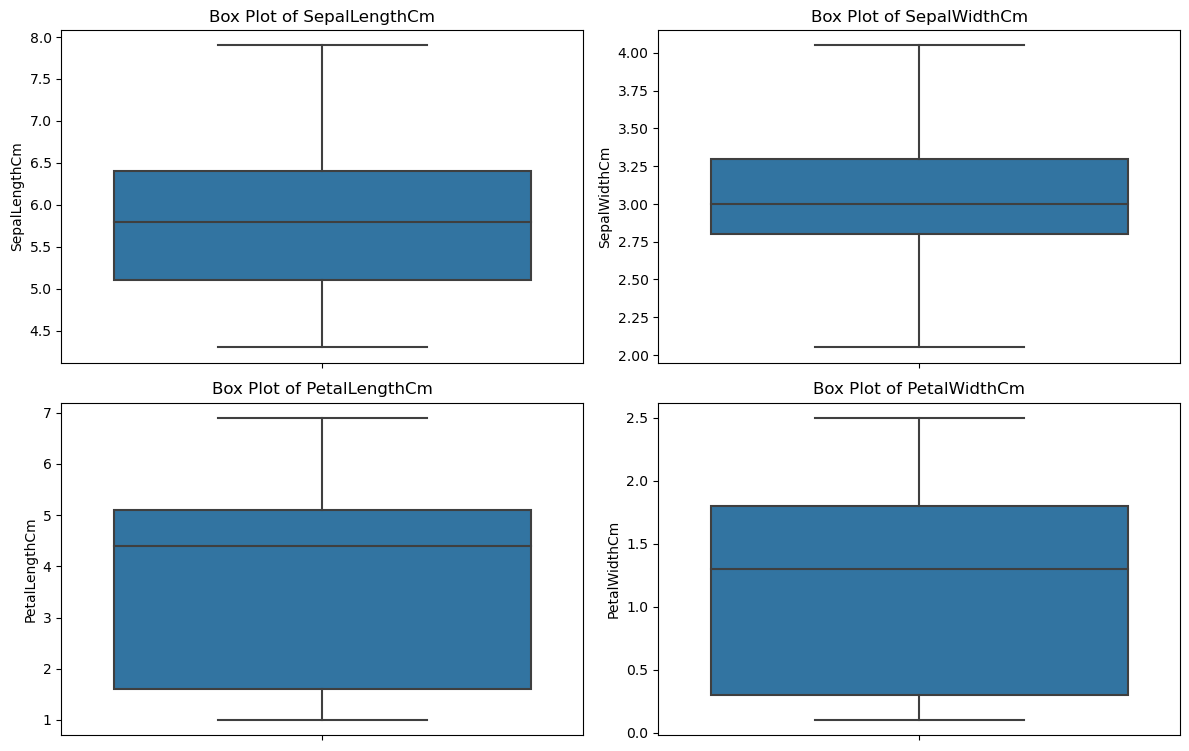

In [25]:
# Select only numeric type of columns by their names as:
df1 = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df1
# Create subplots for Box Plots
plt.figure(figsize=(12, 15))
for i, var in enumerate(df1, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=var, data=df)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

#### Apply Machine Learning Algorithm

In [26]:
# Select only numeric type of columns by their names as:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
x


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
# Select only numeric type of columns by their names as:
y = df[['Species']]
y


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


#### Import Machine Leaning Libraries and Split Dataset

In [28]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (117, 4)
X_test: (30, 4)


#### Create and Fit Model

In [29]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

C:\Users\vamsh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [30]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.93
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Make Predictions with New Data

In [32]:
# # Make predictions on the New data
SepalLengthCm = 5.1
SepalWidthCm = 3.5
PetalLengthCm = 1.4
PetalWidthCm = 0.2
y_pred = svm_model.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
print(f"Predicted Value: {y_pred[0]}")

Predicted Value: Iris-setosa


C:\Users\vamsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#### K-Nearest Neighbors (KNN) Model


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier()

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)


C:\Users\vamsh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [34]:
# Make predictions on the test data
y_pred1 = knn_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
report = classification_report(y_test, y_pred1)
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.93
Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [36]:
# # Make predictions on the New data
SepalLengthCm = 5.1
SepalWidthCm = 3.5
PetalLengthCm = 1.4
PetalWidthCm = 0.2
y_pred = svm_model.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
print(f"Predicted Value: {y_pred[0]}")

Predicted Value: Iris-setosa


C:\Users\vamsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
